# Processamento de Dados

## Imports

In [1]:
import sklearn as skl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.gridspec import GridSpec
import scipy.stats as stats
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset_name = "../model/datasets/FINALDATASET.csv"
braga_data = pd.read_csv(dataset_name)

## Correlações

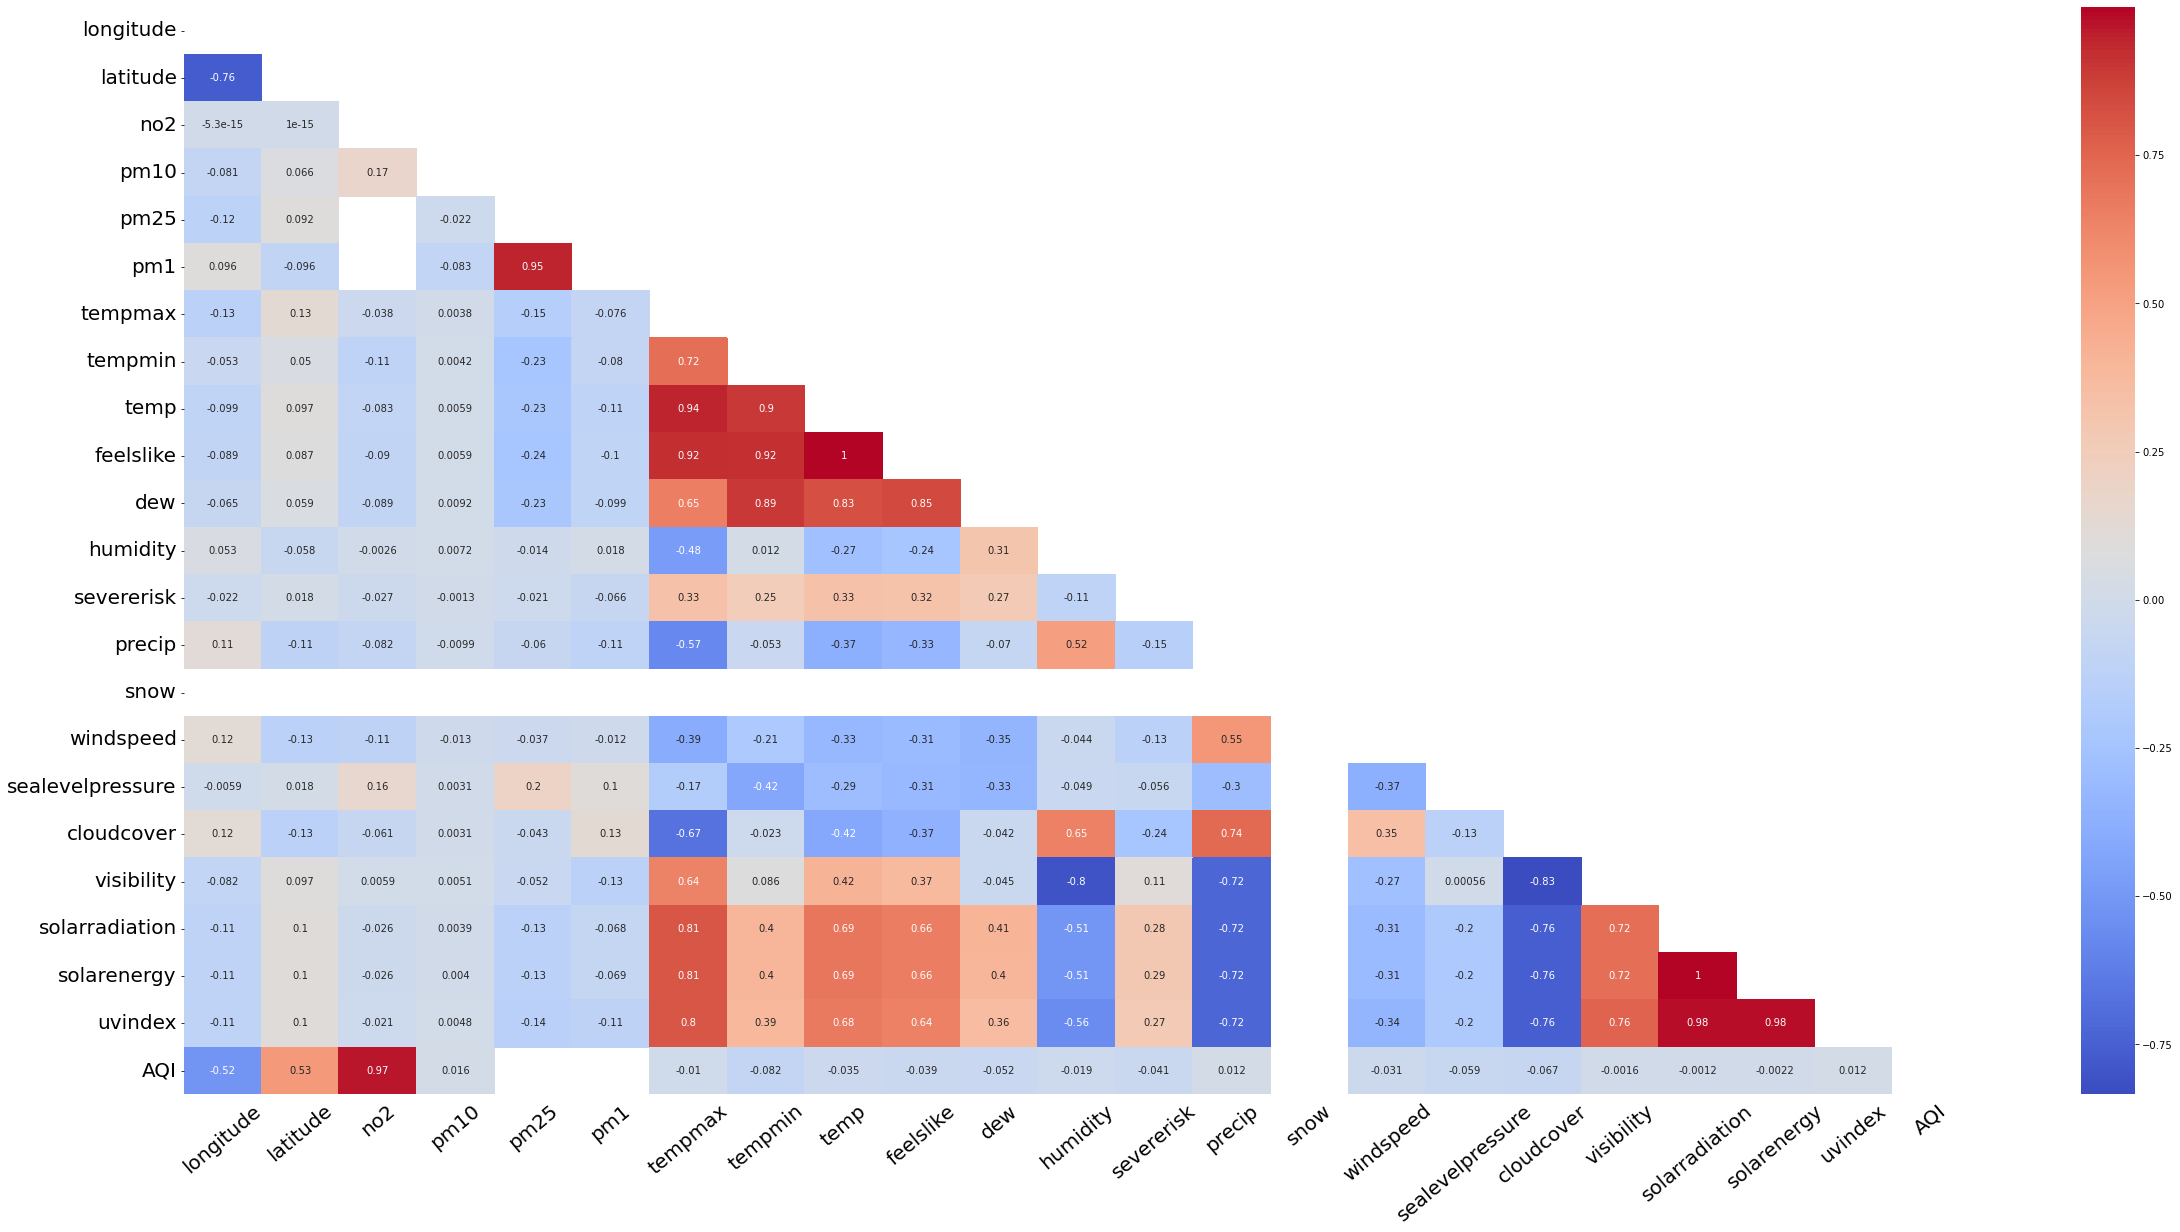

In [4]:
mask = np.triu(np.ones_like(braga_data.corr(), dtype=bool))
sns.heatmap(braga_data.corr(), mask = mask, annot = True, cmap='coolwarm')
# diminuir o tamanho da letra da correlação
plt.rcParams['font.size'] = 10
# só quero a superior à diagonal
mask = np.triu(np.ones_like(braga_data.corr(), dtype=bool))
plt.tick_params(axis='both', labelsize=20, labelbottom = True, bottom=False, top = False, labeltop=False)
# reduzir simetria
plt.xticks(rotation=40)
plt.yticks(rotation=0)
# aumentar o tamanho da figura
plt.rcParams['figure.figsize'] = [40, 20]
plt.show()

In [5]:
# remover 'feelslike', 'uvindex', 'solarradiation'
braga_data = braga_data.drop(['feelslike', 'uvindex', 'solarradiation'], axis = 1)
braga_data.head()

,longitude,latitude,no2,pm10,pm25,pm1,date,time,tempmax,tempmin,...,humidity,severerisk,precip,snow,windspeed,sealevelpressure,cloudcover,visibility,solarenergy,AQI
0,-8.296389,41.449722,32.9,15.0,NaN,NaN,2020-01-01,00:00:00,55.4,50.2,...,84.5,10.0,0.32,0.0,16.9,1018.9,93.9,5.3,4.5,33.0
1,-8.296389,41.449722,34.1,15.0,NaN,NaN,2020-01-01,01:00:00,55.4,50.2,...,84.5,10.0,0.32,0.0,16.9,1018.9,93.9,5.3,4.5,34.0
2,-8.296389,41.449722,45.2,15.0,NaN,NaN,2020-01-01,02:00:00,55.4,50.2,...,84.5,10.0,0.32,0.0,16.9,1018.9,93.9,5.3,4.5,45.0
3,-8.296389,41.449722,44.3,NaN,NaN,NaN,2020-01-01,03:00:00,55.4,50.2,...,84.5,10.0,0.32,0.0,16.9,1018.9,93.9,5.3,4.5,44.0
4,-8.296389,41.449722,34.1,NaN,NaN,NaN,2020-01-01,04:00:00,55.4,50.2,...,84.5,10.0,0.32,0.0,16.9,1018.9,93.9,5.3,4.5,34.0


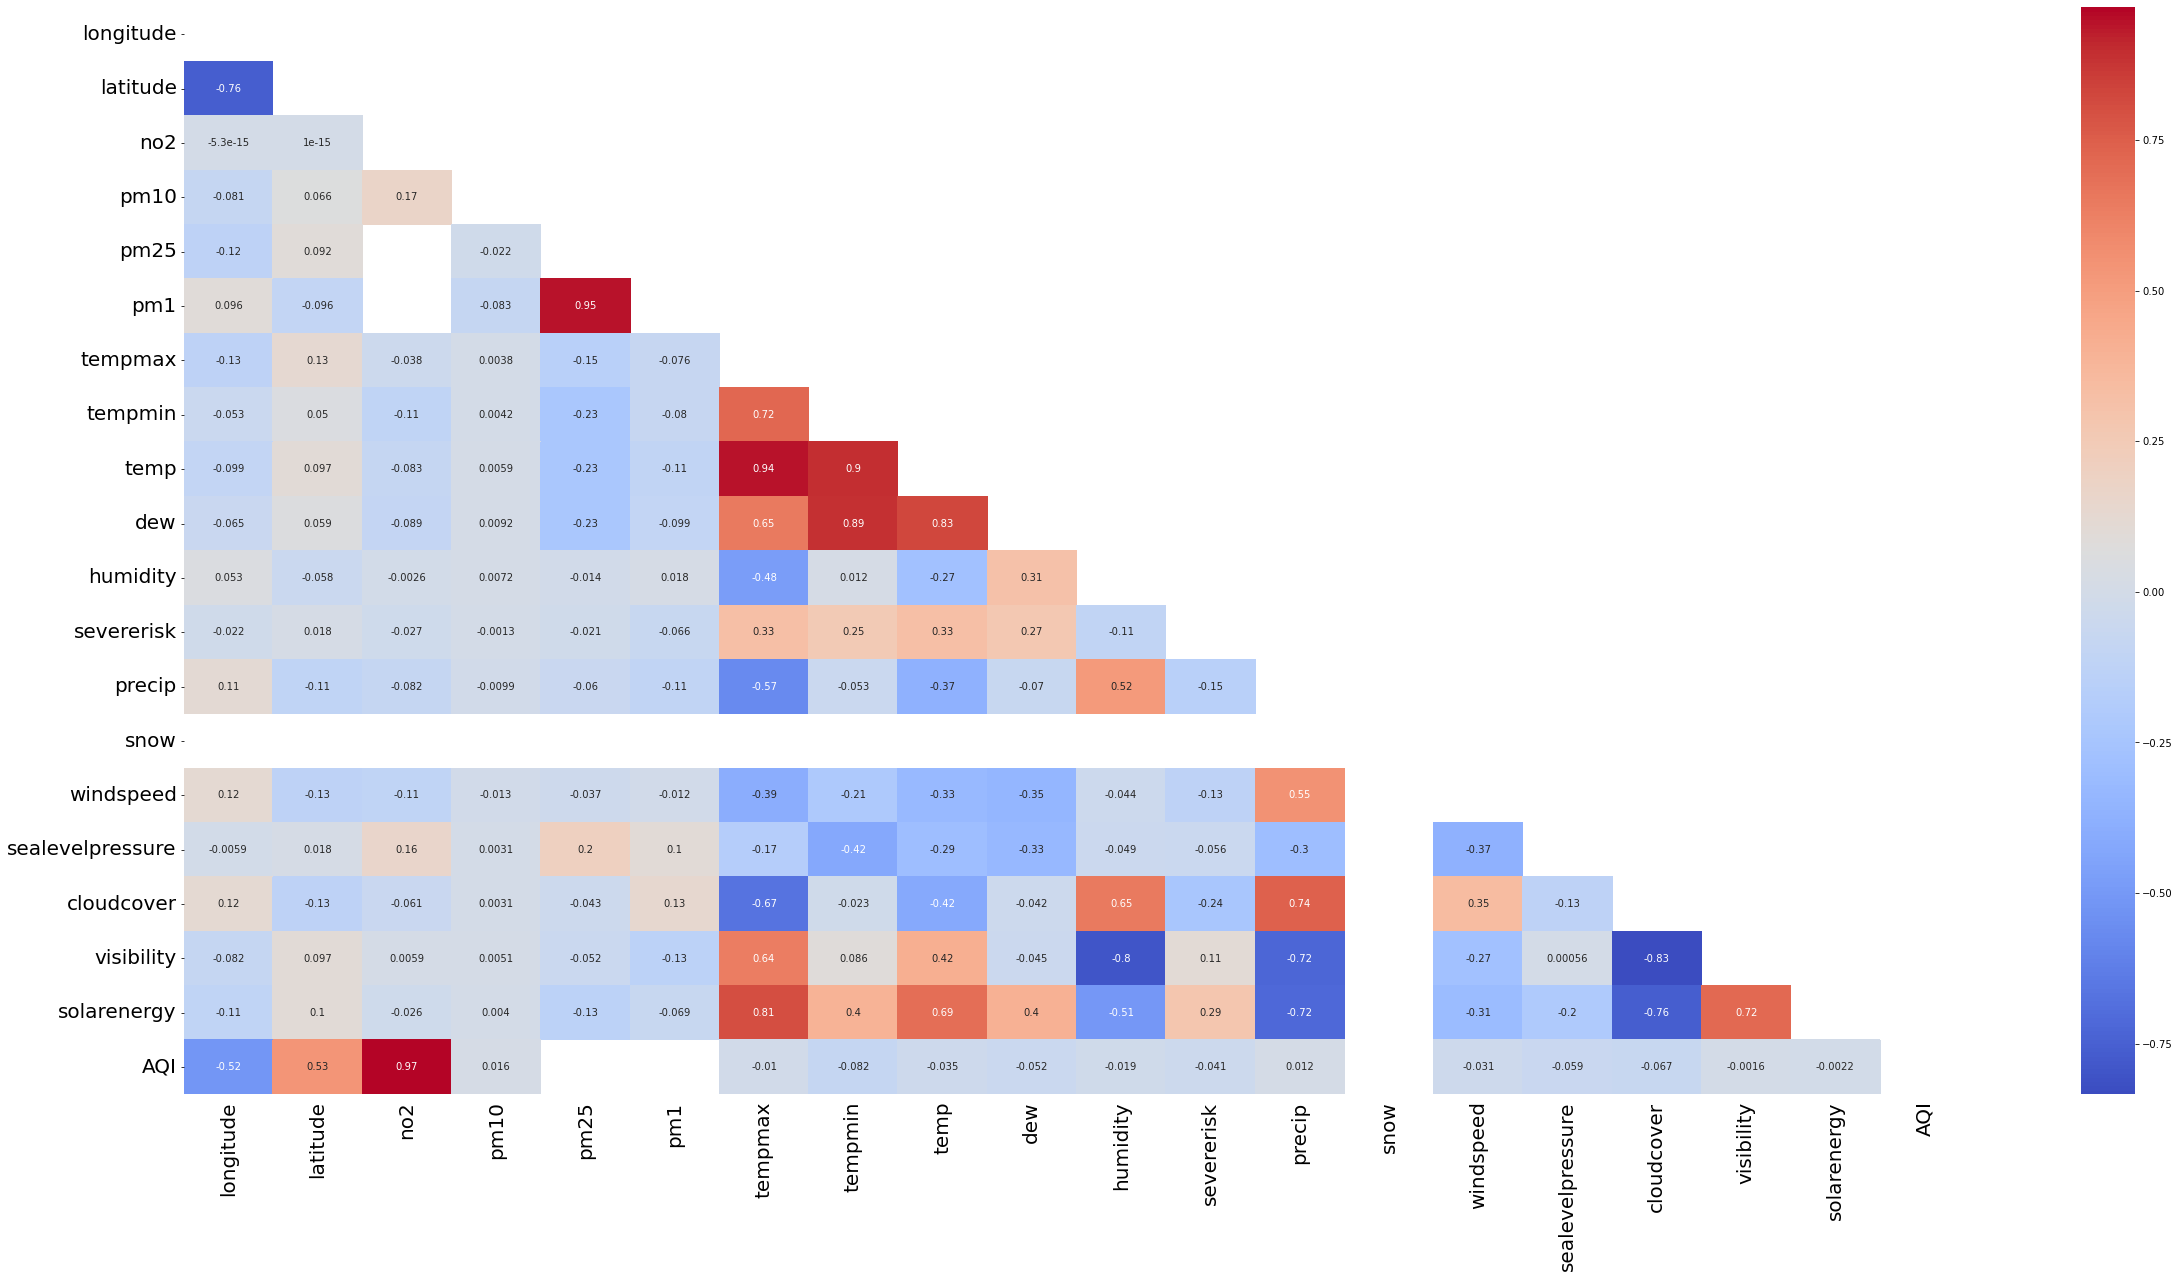

In [6]:
mask = np.triu(np.ones_like(braga_data.corr(), dtype=bool))
sns.heatmap(braga_data.corr(), mask = mask, annot = True, cmap='coolwarm')
# diminuir o tamanho da letra da correlação
plt.rcParams['font.size'] = 20
# só quero a superior à diagonal
mask = np.triu(np.ones_like(braga_data.corr(), dtype=bool))
plt.tick_params(axis='both', labelsize=20, labelbottom = True, bottom=False, top = False, labeltop=False)
# reduzir simetria
plt.xticks(rotation=90)
plt.yticks(rotation=0)
# aumentar o tamanho da figura
plt.rcParams['figure.figsize'] = [40, 20]
plt.show()

## Missing Data

In [11]:
# Find the missing values
braga_data.isnull().sum()

longitude               0
latitude                0
no2                  3911
pm10                 5437
pm25                18335
pm1                 18932
date                  867
time                  867
tempmax                 0
tempmin                 0
temp                    0
dew                     0
humidity                0
severerisk              0
precip                  0
snow                    0
windspeed               0
sealevelpressure        0
cloudcover              0
visibility              0
solarenergy             0
AQI                     0
dtype: int64

In [8]:
import pandas as pd

# Find range for pm25 and pm10

pm25_mean = braga_data['pm25'].mean()
pm10_mean = braga_data['pm10'].mean()

# PM2.5
print("PM2.5")
pm25_max = braga_data['pm25'].max()
pm25_min = braga_data['pm25'].min()
print("Max: ", pm25_max)
print("Min: ", pm25_min)
print("Mean: ", pm25_mean)


# PM10
print("PM10")
pm10_min = braga_data['pm10'].min()
pm10_max = braga_data['pm10'].max()
print("Max: ", pm10_max)
print("Min: ", pm10_min)
print("Mean: ", pm10_mean)


PM2.5
Max:  60.73
Min:  0.1
Mean:  6.954101969872537
PM10
Max:  138074.0
Min:  0.0
Mean:  26.298475401496983


In [20]:
# Drop the missing values on date and time

braga_data.dropna(subset=['date', 'time'], inplace=True)

# Find the missing values
braga_data.isnull().sum()

longitude               0
latitude                0
no2                     0
pm10                    0
pm25                16743
pm1                 16743
date                    0
time                    0
tempmax                 0
tempmin                 0
temp                    0
dew                     0
humidity                0
severerisk              0
precip                  0
snow                    0
windspeed               0
sealevelpressure        0
cloudcover              0
visibility              0
solarenergy             0
AQI                     0
dtype: int64

In [21]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Load data into DataFrame
df = pd.read_csv(dataset_name)

df.dropna(subset=['date', 'time'], inplace=True)

# Convert 'date' and 'time' columns to datetime format
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])

# Sort data by datetime
df.sort_values(by='datetime', inplace=True)

# List of pollutants
pollutants = ['no2', 'pm10', 'pm25', 'pm1']

# Apply multiple imputations on the pollutants data
imputer = IterativeImputer(max_iter=10, random_state=0)
df[pollutants] = imputer.fit_transform(df[pollutants])

# Save the dataframe with the imputed values to a new CSV file
df.to_csv('imputed_data.csv', index=False)

# Outliers

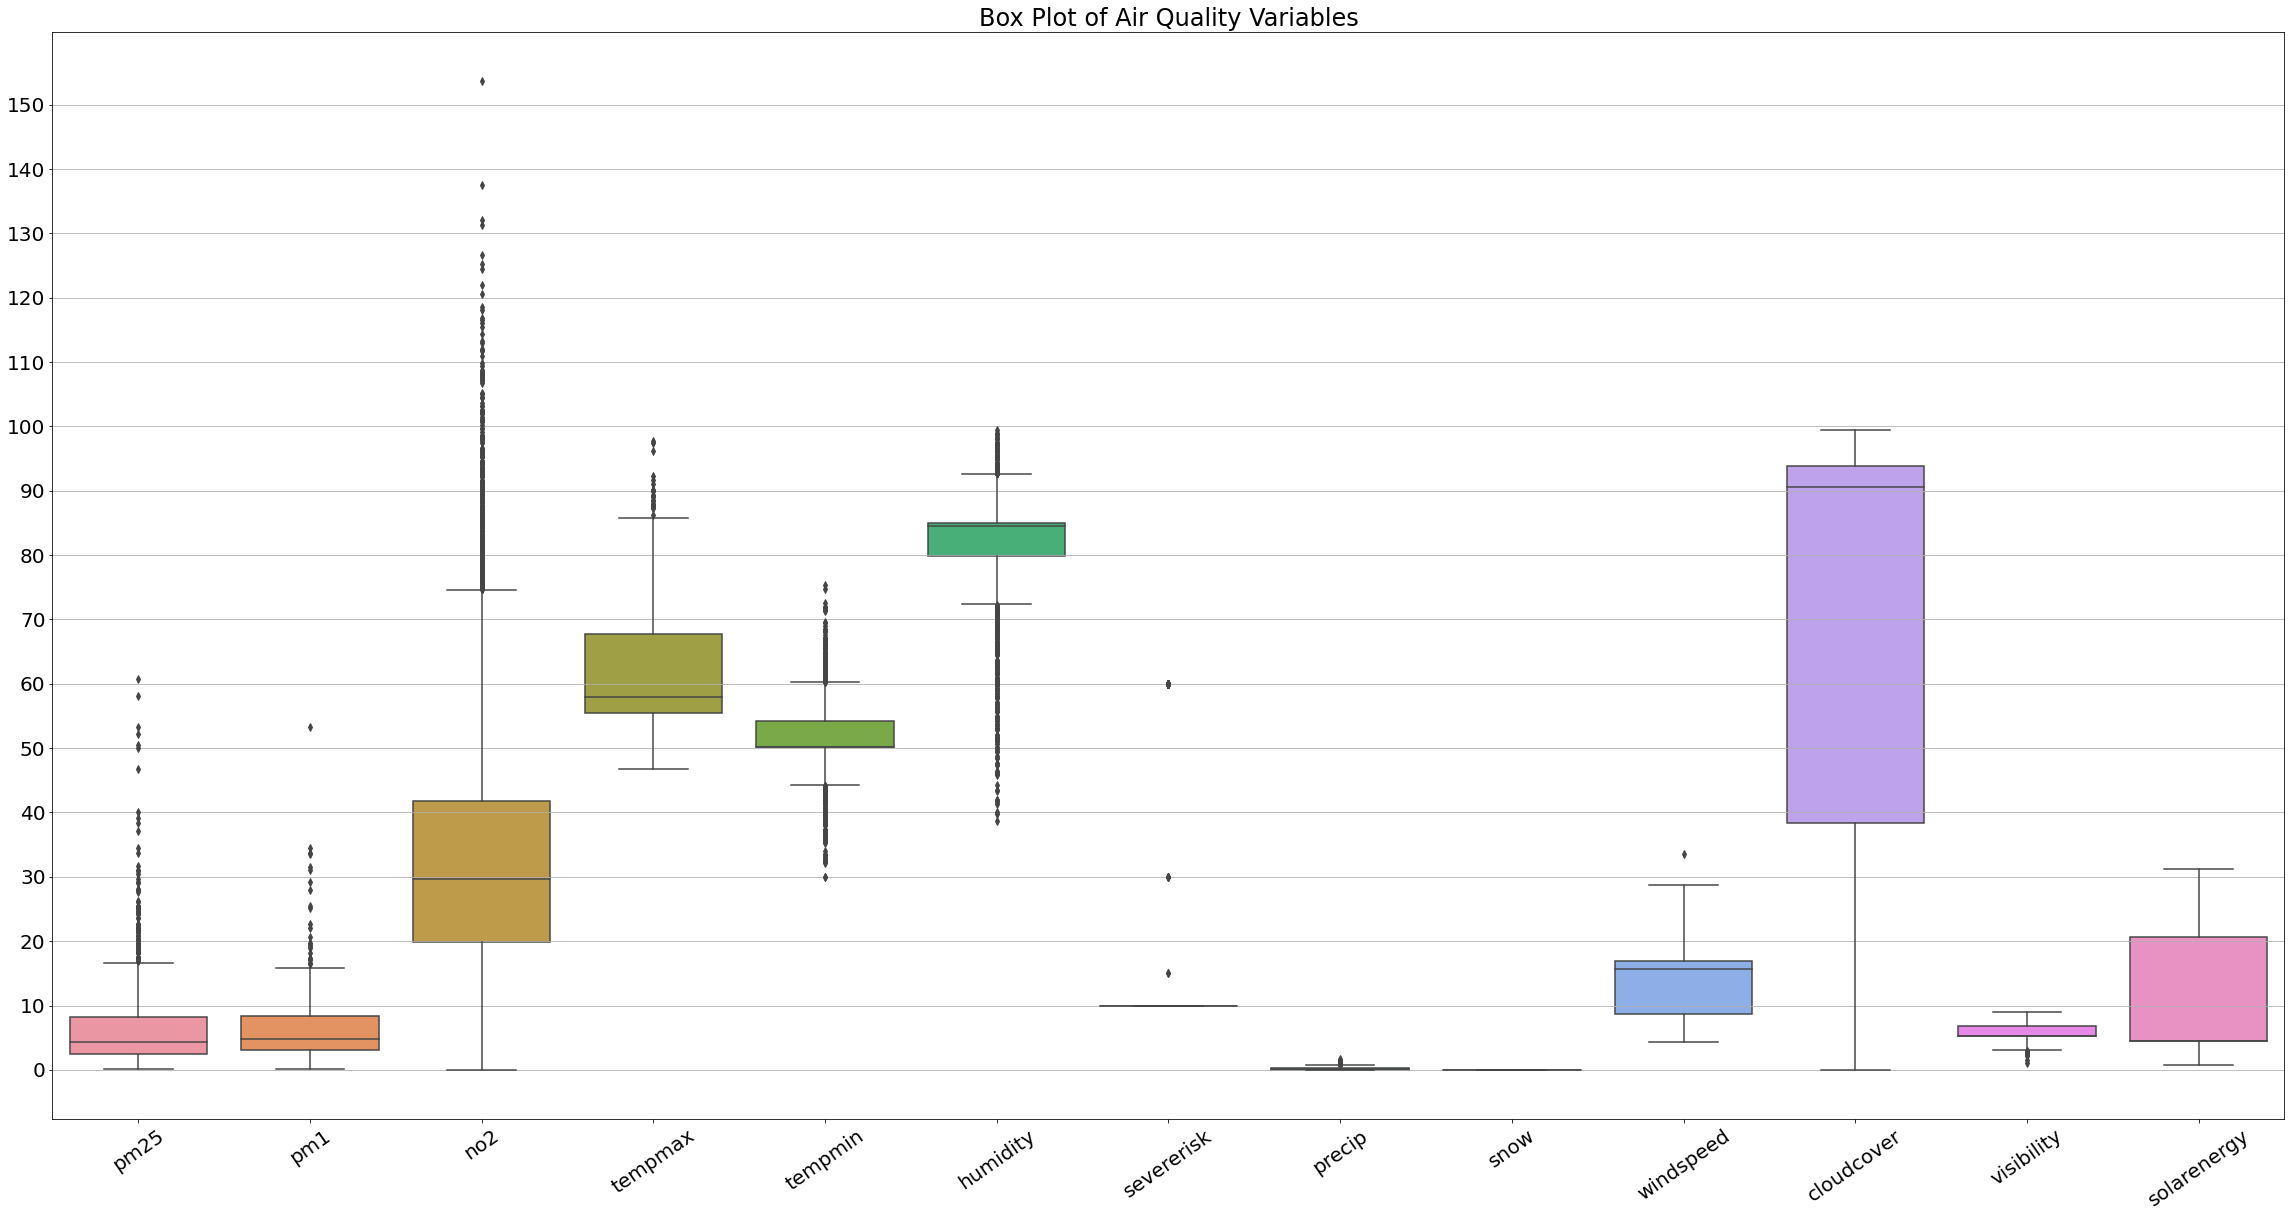

In [7]:
columns = ['pm25', 'pm1', 'no2','tempmax', 'tempmin',	'humidity'	,'severerisk', 'precip',	'snow','windspeed',	'cloudcover',	'visibility',	'solarenergy']

sns.boxplot(data=braga_data[columns])

plt.rcParams['figure.figsize'] = [30, 20]

# Set title

plt.title('Box Plot of Air Quality Variables')

# Make it show the y-axis grid

plt.grid(axis='y')
 
#Make the interval of the y-axis 1000

plt.yticks(np.arange(0, 160, 10))

plt.xticks(rotation=35)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()
